In [111]:
# scenario 1 considers all the columns for model building, details are given in the subsequent steps below
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

In [112]:
#Input file upload
zeta_dis = pd.read_csv("F:/jobs/career/2021-01-21_zeta-disease_training-data_dsi-take-home-challenge.csv", delimiter = ',')

In [113]:
zeta_dis

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,54,189,27.1,80,0,1.5038,0,10,0
1,23,150,38.5,68,71,0.3868,55,2,0
2,47,186,29.9,90,0,0.2728,0,7,0
3,18,150,30.8,70,1033,0.6598,56,0,0
4,24,160,32.4,74,125,0.7608,59,2,0
...,...,...,...,...,...,...,...,...,...
795,26,161,28.4,90,78,0.5578,42,3,0
796,37,165,33.7,60,0,0.3078,69,6,1
797,27,166,25.6,74,0,0.2638,0,5,0
798,109,139,28.1,66,94,0.2298,53,1,0


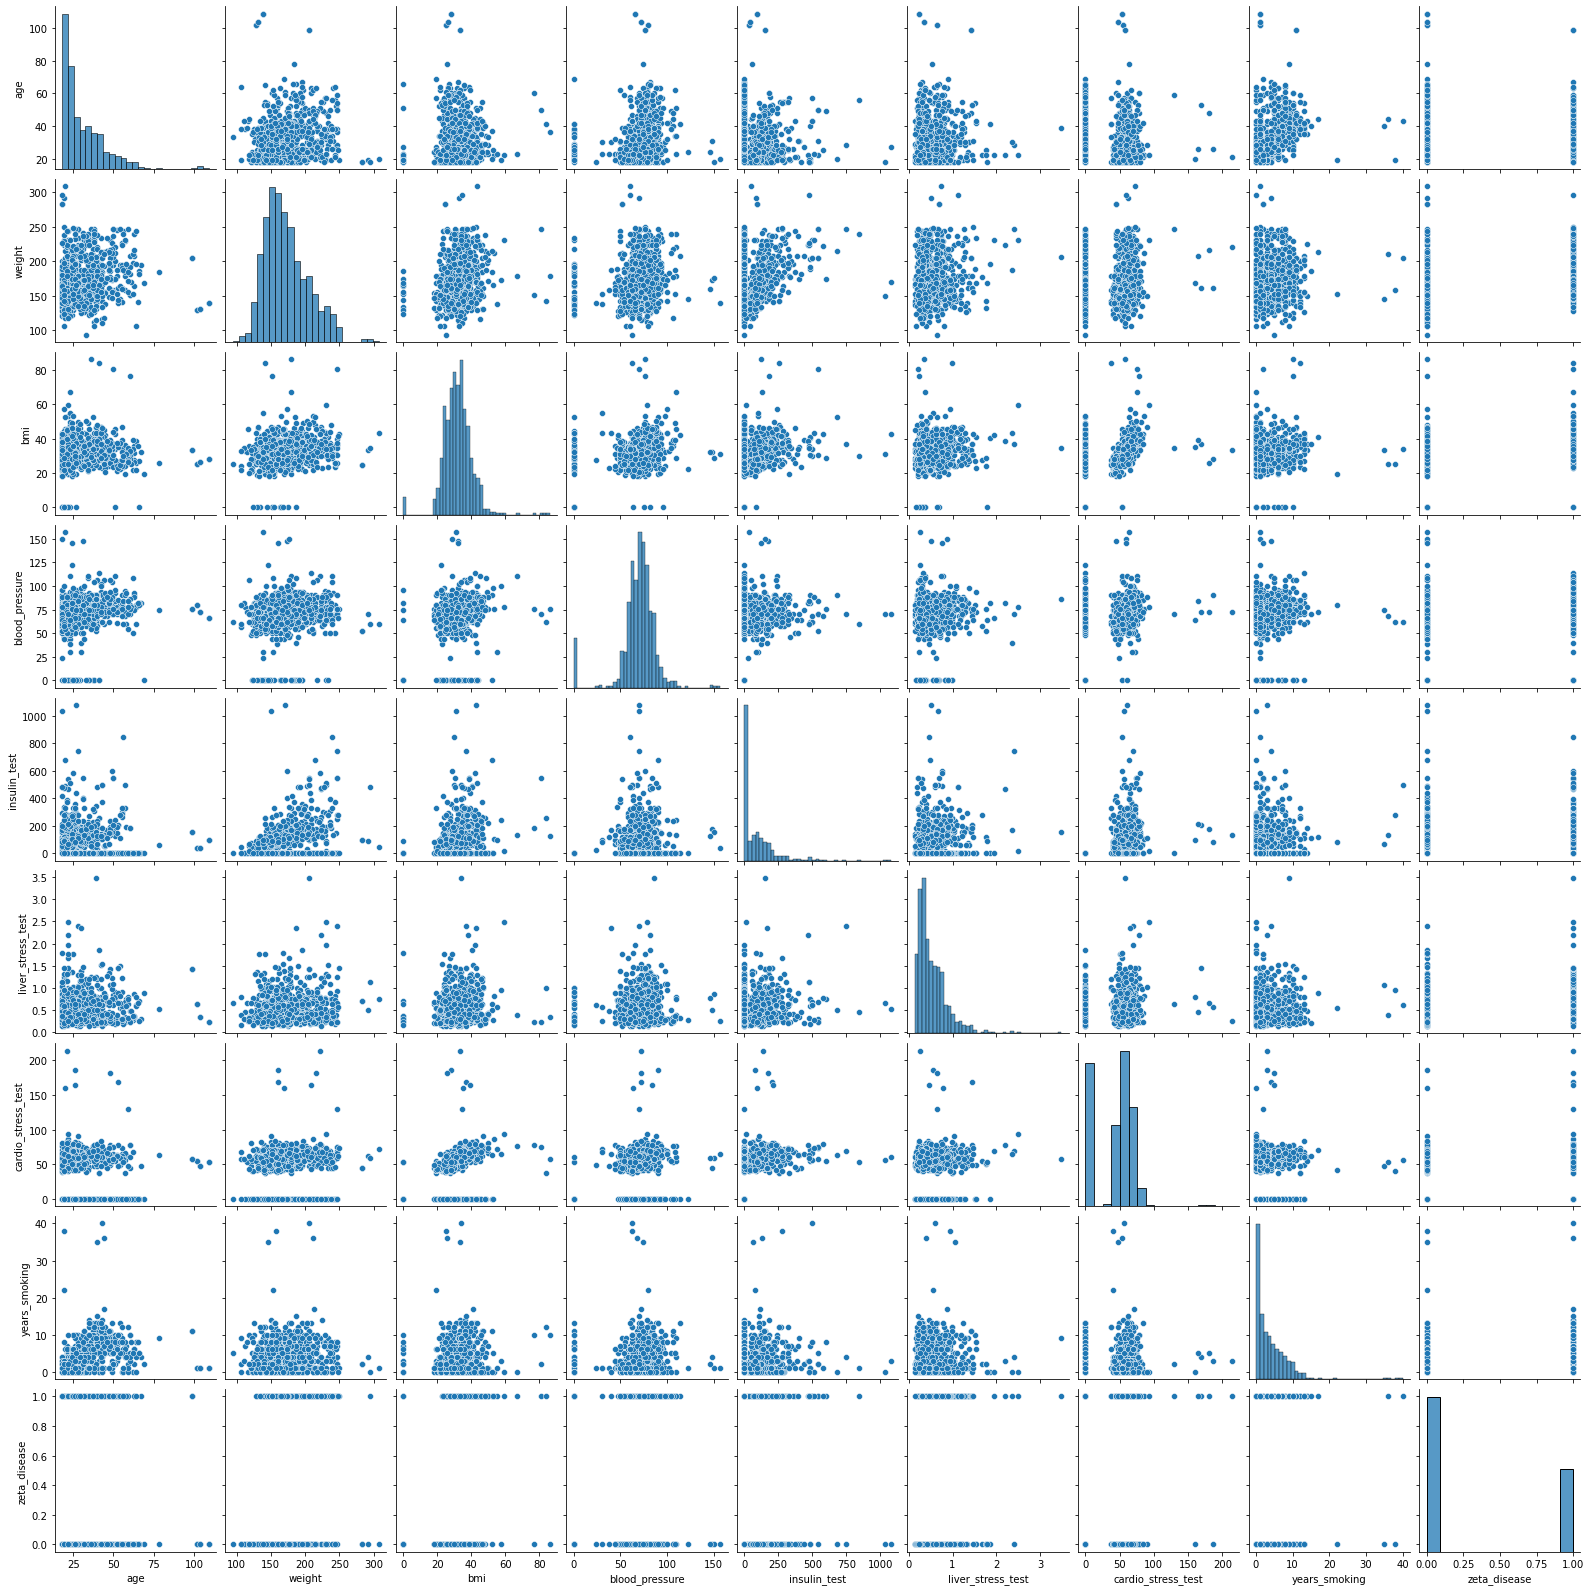

In [114]:
# 2X2 plot of all the variables, does not highlight any specific oddity in data, there are some outliers,
#but mostly data is balanced
sns.pairplot(zeta_dis)

<AxesSubplot:xlabel='zeta_disease', ylabel='count'>

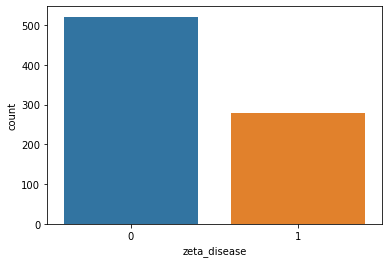

In [116]:
# specific distribution of 1's and 0's 
sns.countplot(x='zeta_disease', data=zeta_dis)

In [12]:
# to check null values, there are no null or missing values
print (zeta_dis.isnull().sum())

age                   0
weight                0
bmi                   0
blood_pressure        0
insulin_test          0
liver_stress_test     0
cardio_stress_test    0
years_smoking         0
zeta_disease          0
dtype: int64


In [14]:
# Data info, all features are integer or float, no categorical even "zeta disease" one because the values are numerical,
#but in nature it is categorical, will be used as feature to be predicted
zeta_dis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 800 non-null    int64  
 1   weight              800 non-null    int64  
 2   bmi                 800 non-null    float64
 3   blood_pressure      800 non-null    int64  
 4   insulin_test        800 non-null    int64  
 5   liver_stress_test   800 non-null    float64
 6   cardio_stress_test  800 non-null    int64  
 7   years_smoking       800 non-null    int64  
 8   zeta_disease        800 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 56.4 KB


In [15]:
# Distribution of average for all columns
zeta_dis.mean()

age                    30.985000
weight                172.407500
bmi                    32.201625
blood_pressure         69.565000
insulin_test           85.887500
liver_stress_test       0.544496
cardio_stress_test     43.121250
years_smoking           4.051250
zeta_disease            0.348750
dtype: float64

In [16]:
#Distribution of Median for all columns
zeta_dis.median()

age                    26.0000
weight                167.0000
bmi                    32.0500
blood_pressure         72.0000
insulin_test           45.0000
liver_stress_test       0.4453
cardio_stress_test     53.0000
years_smoking           3.0000
zeta_disease            0.0000
dtype: float64

In [17]:
# Distribution to show max of all columns
zeta_dis.max()

age                    109.0000
weight                 308.0000
bmi                     86.1000
blood_pressure         157.0000
insulin_test          1077.0000
liver_stress_test        3.4813
cardio_stress_test     214.0000
years_smoking           40.0000
zeta_disease             1.0000
dtype: float64

In [18]:
# Dist to show Min of all columns
zeta_dis.min()

age                   18.0000
weight                94.0000
bmi                    0.0000
blood_pressure         0.0000
insulin_test           0.0000
liver_stress_test      0.1408
cardio_stress_test     0.0000
years_smoking          0.0000
zeta_disease           0.0000
dtype: float64

In [19]:
# To count 0 values in each column, out of these bmi and blood pressure columns having 0 is unusual, so I will consider 0 
# values in these columns as missing value, and replace them with median, since medians for these 2 are very close to mean.

# For insulin_test and liver_stress_test scores, having so many 0's is again unusual, but since these are scores, so in this
# scenario 1, i will consider these two columns as valid column and use the values
zeta_dis.isin([0]).sum()

age                     0
weight                  0
bmi                    11
blood_pressure         35
insulin_test          370
liver_stress_test       0
cardio_stress_test    227
years_smoking         114
zeta_disease          521
dtype: int64

In [21]:
zeta_dis_ch = pd.DataFrame(zeta_dis)

In [22]:
zeta_dis_ch.isin([0]).sum()

age                     0
weight                  0
bmi                    11
blood_pressure         35
insulin_test          370
liver_stress_test       0
cardio_stress_test    227
years_smoking         114
zeta_disease          521
dtype: int64

In [24]:
zeta_dis_ch.loc[zeta_dis_ch.bmi ==0,'bmi'] = zeta_dis_ch['bmi'].median()
zeta_dis_ch.loc[zeta_dis_ch.blood_pressure ==0,'blood_pressure'] = zeta_dis_ch['blood_pressure'].median()

In [25]:
zeta_dis_ch.isin([0]).sum()

age                     0
weight                  0
bmi                     0
blood_pressure          0
insulin_test          370
liver_stress_test       0
cardio_stress_test    227
years_smoking         114
zeta_disease          521
dtype: int64

In [31]:
zeta_dis_ch1 = pd.DataFrame(zeta_dis_ch)

In [32]:
#zeta_dis_ch1.drop(['insulin_test','cardio_stress_test'], axis = 1, inplace = True)

In [33]:
zeta_dis_ch1

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,54,189,27.1,80,0,1.5038,0,10,0
1,23,150,38.5,68,71,0.3868,55,2,0
2,47,186,29.9,90,0,0.2728,0,7,0
3,18,150,30.8,70,1033,0.6598,56,0,0
4,24,160,32.4,74,125,0.7608,59,2,0
...,...,...,...,...,...,...,...,...,...
795,26,161,28.4,90,78,0.5578,42,3,0
796,37,165,33.7,60,0,0.3078,69,6,1
797,27,166,25.6,74,0,0.2638,0,5,0
798,109,139,28.1,66,94,0.2298,53,1,0


In [89]:
# separating input file in two dataframes, dependent and independent variables
#y_data
y_feat = zeta_dis_ch1['zeta_disease']
#x_data
x_feat = zeta_dis_ch1.drop('zeta_disease',axis = 1)

In [90]:
zeta_dis_ch1.columns

Index(['age', 'weight', 'bmi', 'blood_pressure', 'insulin_test',
       'liver_stress_test', 'cardio_stress_test', 'years_smoking',
       'zeta_disease'],
      dtype='object')

In [50]:
# split in train and test data
x_training_data,  x_test_data, y_training_data, y_test_data = train_test_split(x_feat, y_feat, test_size = 0.3)

In [55]:
model = LogisticRegression()

In [56]:
model.fit(x_training_data, y_training_data)

C:\Users\shantanu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [91]:
# due to above convergence error, i am increasing the max_iter to 4000
model = LogisticRegression(solver='lbfgs',max_iter=4000)

In [92]:
model.fit(x_training_data, y_training_data)

LogisticRegression(max_iter=4000)

In [59]:
predictions = model.predict(x_testdata)

In [60]:
# predicted values in the test data
predictions

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0],
      dtype=int64)

In [61]:
#class_names = zeta_dis_ch1.zeta_disease

In [62]:
# classification report
class_rep = classification_report(y_testdata, predictions)

In [64]:
class_rep

'              precision    recall  f1-score   support\n\n           0       0.82      0.88      0.85       156\n           1       0.74      0.64      0.69        84\n\n    accuracy                           0.80       240\n   macro avg       0.78      0.76      0.77       240\nweighted avg       0.79      0.80      0.79       240\n'

In [93]:
# above classification report print is not properly aligned, as the output is string object type
class_rep.dtypes

AttributeError: 'str' object has no attribute 'dtypes'

In [94]:
# resolve the issue of classification report presentation
print(class_rep, sep = '/n')

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       156
           1       0.74      0.64      0.69        84

    accuracy                           0.80       240
   macro avg       0.78      0.76      0.77       240
weighted avg       0.79      0.80      0.79       240



In [66]:
class_rep1 = confusion_matrix(y_testdata, predictions)

In [67]:
class_rep1

array([[137,  19],
       [ 30,  54]], dtype=int64)

In [95]:
#Importing prediction file
zeta_dis_predic2 = pd.read_csv("F:/jobs/career/2021-01-21_zeta-disease_prediction-data_dsi-take-home-challenge.csv")

In [96]:
zeta_dis_predic2

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,24,151,39.5,69,72,1.3968,56,4,NaN
1,27,179,35.5,89,156,1.6608,43,6,NaN
2,34,147,26.9,76,74,1.6958,53,2,NaN
3,35,206,32.4,73,127,1.4608,61,6,NaN
4,60,193,29.8,62,192,1.7798,65,9,NaN
5,45,120,36.5,108,50,1.2978,54,12,NaN
6,20,139,38.2,61,77,1.5818,68,3,NaN
7,23,137,31.2,70,73,1.4168,59,7,NaN
8,36,195,30.5,59,141,1.4498,59,6,NaN
9,19,193,25.8,84,66,1.7938,50,3,NaN


In [70]:
zeta_dis_predic3 = pd.DataFrame(zeta_dis_predic2)
zeta_dis_predic3

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,24,151,39.5,69,72,1.3968,56,4,NaN
1,27,179,35.5,89,156,1.6608,43,6,NaN
2,34,147,26.9,76,74,1.6958,53,2,NaN
3,35,206,32.4,73,127,1.4608,61,6,NaN
4,60,193,29.8,62,192,1.7798,65,9,NaN
5,45,120,36.5,108,50,1.2978,54,12,NaN
6,20,139,38.2,61,77,1.5818,68,3,NaN
7,23,137,31.2,70,73,1.4168,59,7,NaN
8,36,195,30.5,59,141,1.4498,59,6,NaN
9,19,193,25.8,84,66,1.7938,50,3,NaN


In [71]:
#zeta_dis_pred3.drop(['insulin_test','cardio_stress_test'], axis = 1, inplace = True)
#zeta_dis_pred3

In [72]:
#zeta_dis_pred3

In [73]:
#separate prediction file data in dependent and independent sets
#y_data
y_feat_pred1 = zeta_dis_predic3['zeta_disease']
y_feat_pred1

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
Name: zeta_disease, dtype: float64

In [74]:
zeta_dis_predic4 = pd.DataFrame(zeta_dis_predic3)
zeta_dis_predic4.drop(['zeta_disease'], axis = 1, inplace = True)
zeta_dis_predic4

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking
0,24,151,39.5,69,72,1.3968,56,4
1,27,179,35.5,89,156,1.6608,43,6
2,34,147,26.9,76,74,1.6958,53,2
3,35,206,32.4,73,127,1.4608,61,6
4,60,193,29.8,62,192,1.7798,65,9
5,45,120,36.5,108,50,1.2978,54,12
6,20,139,38.2,61,77,1.5818,68,3
7,23,137,31.2,70,73,1.4168,59,7
8,36,195,30.5,59,141,1.4498,59,6
9,19,193,25.8,84,66,1.7938,50,3


In [98]:
#x_data
x_feat_pred1 = zeta_dis_predic4

In [77]:
print(x_feat_pred1)

    age  weight   bmi  blood_pressure  insulin_test  liver_stress_test  \
0    24     151  39.5              69            72             1.3968   
1    27     179  35.5              89           156             1.6608   
2    34     147  26.9              76            74             1.6958   
3    35     206  32.4              73           127             1.4608   
4    60     193  29.8              62           192             1.7798   
5    45     120  36.5             108            50             1.2978   
6    20     139  38.2              61            77             1.5818   
7    23     137  31.2              70            73             1.4168   
8    36     195  30.5              59           141             1.4498   
9    19     193  25.8              84            66             1.7938   
10   47     216  34.7              70           170             1.7238   
11   40     200  30.4              69           128             1.3118   
12   21     154  46.5              88 

In [78]:
# model prediction on zeta disease prediction file
predictions_1 = model.predict(x_feat_pred1)

In [79]:
predictions_1

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [80]:
# output is in array form
predictions_1.info()

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [81]:
#pred_array1 = np.array(predictions_1)

In [102]:
# add header
dict_predarray1 = {'zeta_disease_prediction':predictions_1}

In [103]:
# convert the array in dataframe
df_zetapred1 = pd.DataFrame(dict_predarray1)
df_zetapred1

,zeta_disease_prediction
0,0
1,1
2,0
3,1
4,1
5,0
6,0
7,0
8,1
9,0


In [104]:
#Append prediction values to prediction data file
zeta_dis_predic2['zeta_disease_prediction'] = df_zetapred1['zeta_disease_prediction'].values


In [105]:
zeta_dis_predic2

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease,zeta_disease_prediction
0,24,151,39.5,69,72,1.3968,56,4,NaN,0
1,27,179,35.5,89,156,1.6608,43,6,NaN,1
2,34,147,26.9,76,74,1.6958,53,2,NaN,0
3,35,206,32.4,73,127,1.4608,61,6,NaN,1
4,60,193,29.8,62,192,1.7798,65,9,NaN,1
5,45,120,36.5,108,50,1.2978,54,12,NaN,0
6,20,139,38.2,61,77,1.5818,68,3,NaN,0
7,23,137,31.2,70,73,1.4168,59,7,NaN,0
8,36,195,30.5,59,141,1.4498,59,6,NaN,1
9,19,193,25.8,84,66,1.7938,50,3,NaN,0


In [107]:
final_zeta_dis_predic1 = pd.DataFrame(zeta_dis_predic2)

In [108]:
# remove blank column of zeta_disease from original prediction data file, below table shows the final prediction output
final_zeta_dis_predic1.drop('zeta_disease', axis = 1, inplace = True)
final_zeta_dis_predic1

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease_prediction
0,24,151,39.5,69,72,1.3968,56,4,0
1,27,179,35.5,89,156,1.6608,43,6,1
2,34,147,26.9,76,74,1.6958,53,2,0
3,35,206,32.4,73,127,1.4608,61,6,1
4,60,193,29.8,62,192,1.7798,65,9,1
5,45,120,36.5,108,50,1.2978,54,12,0
6,20,139,38.2,61,77,1.5818,68,3,0
7,23,137,31.2,70,73,1.4168,59,7,0
8,36,195,30.5,59,141,1.4498,59,6,1
9,19,193,25.8,84,66,1.7938,50,3,0


In [109]:
# save output file in local folder
final_zeta_dis_predic1.to_csv(r"F:/jobs/career/Zeta_scenario1_modeloutput.csv", index = False)